In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare the Text
sample_text = "Natural language processing (NLP) involves the interaction between computers and humans through language. It enables machines to read, understand, and derive meaning from human languages."

# Step 2: Vectorize the Text using Universal Sentence Encoder from TensorFlow Hub
# Load Universal Sentence Encoder
embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", input_shape=[], dtype=tf.string, trainable=False)

# Convert the sample text into an embedding
text_embedding = embedding_layer([sample_text])
print("Original Embedding Shape:", text_embedding.shape)

# Step 3: Build and Train an Autoencoder Model to reduce dimensionality to a 2D array
# Define the encoder model
encoder_input = tf.keras.Input(shape=(text_embedding.shape[-1],))
encoded = tf.keras.layers.Dense(128, activation='relu')(encoder_input)
encoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(32, activation='relu')(encoded)
encoded_output = tf.keras.layers.Dense(2 * 2, activation='linear')(encoded)  # 2x2 array output

encoder = tf.keras.Model(encoder_input, encoded_output, name='encoder')

# Define the decoder model
decoder_input = tf.keras.Input(shape=(2 * 2,))
decoded = tf.keras.layers.Dense(32, activation='relu')(decoder_input)
decoded = tf.keras.layers.Dense(64, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(128, activation='relu')(decoded)
decoded_output = tf.keras.layers.Dense(text_embedding.shape[-1], activation='sigmoid')(decoded)

decoder = tf.keras.Model(decoder_input, decoded_output, name='decoder')

# Combine encoder and decoder into an autoencoder model
autoencoder_input = encoder_input
encoded_embedding = encoder(autoencoder_input)
decoded_embedding = decoder(encoded_embedding)

autoencoder = tf.keras.Model(autoencoder_input, decoded_embedding, name='autoencoder')
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
# Here, we use the text embedding itself as the target (autoencoder learns to reconstruct its input)
autoencoder.fit(text_embedding, text_embedding, epochs=100, batch_size=1, verbose=0)

# Predict the 2D coordinates
encoded_2d_array = encoder(text_embedding)
print("2D Array for the Input Text:", encoded_2d_array.numpy().reshape(2, 2))

# Step 4: Visualize the 2D Array Result
encoded_2d_array_reshaped = encoded_2d_array.numpy().reshape(2, 2)

plt.figure(figsize=(6, 6))
plt.imshow(encoded_2d_array_reshaped, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('2D Array Embedding of the Text')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_20newsgroups

# Step 1: Prepare Multiple Text Samples
newsgroups = fetch_20newsgroups(subset='train')
texts = newsgroups.data[:1000]  # Limit to 1000 samples for this example

# Step 2: Convert Text Samples into Embeddings using Universal Sentence Encoder
embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", input_shape=[], dtype=tf.string, trainable=False)

text_embeddings = embedding_layer(texts)
print("Original Embedding Shape:", text_embeddings.shape)

# Step 3: Build and Train an Autoencoder to reduce dimensionality to a large 2D grid
grid_size = 30  # 30x30 grid
latent_dim = grid_size * grid_size

# Define the encoder model
encoder_input = tf.keras.Input(shape=(text_embeddings.shape[-1],))
encoded = tf.keras.layers.Dense(512, activation='relu')(encoder_input)
encoded = tf.keras.layers.Dense(256, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(128, activation='relu')(encoded)
encoded_output = tf.keras.layers.Dense(latent_dim, activation='linear')(encoded)  # Larger 2D grid output

encoder = tf.keras.Model(encoder_input, encoded_output, name='encoder')

# Define the decoder model
decoder_input = tf.keras.Input(shape=(latent_dim,))
decoded = tf.keras.layers.Dense(128, activation='relu')(decoder_input)
decoded = tf.keras.layers.Dense(256, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(512, activation='relu')(decoded)
decoded_output = tf.keras.layers.Dense(text_embeddings.shape[-1], activation='sigmoid')(decoded)

decoder = tf.keras.Model(decoder_input, decoded_output, name='decoder')

# Combine encoder and decoder into an autoencoder model
autoencoder_input = encoder_input
encoded_embedding = encoder(autoencoder_input)
decoded_embedding = decoder(encoded_embedding)

autoencoder = tf.keras.Model(autoencoder_input, decoded_embedding, name='autoencoder')
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(text_embeddings, text_embeddings, epochs=50, batch_size=32, verbose=1)

# Step 4: Visualize the 2D Grid in 3D
encoded_2d_grid = encoder(text_embeddings).numpy().reshape(-1, grid_size, grid_size)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(range(grid_size), range(grid_size))
for i in range(encoded_2d_grid.shape[0]):
    Z = encoded_2d_grid[i]
    ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_title('3D Visualization of Text Embeddings')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Embedding Value')
plt.show()


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_20newsgroups
from scipy.ndimage import gaussian_filter

# Step 1: Prepare Multiple Text Samples
newsgroups = fetch_20newsgroups(subset='train')
texts = newsgroups.data[:1000]  # Limit to 1000 samples for this example

# Step 2: Convert Text Samples into Embeddings using Universal Sentence Encoder
embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", input_shape=[], dtype=tf.string, trainable=False)

text_embeddings = embedding_layer(texts)
print("Original Embedding Shape:", text_embeddings.shape)

# Step 3: Build and Train an Autoencoder to reduce dimensionality to a large 2D grid
grid_size = 30  # 30x30 grid
latent_dim = grid_size * grid_size

# Define the encoder model
encoder_input = tf.keras.Input(shape=(text_embeddings.shape[-1],))
encoded = tf.keras.layers.Dense(512, activation='relu')(encoder_input)
encoded = tf.keras.layers.Dense(256, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(128, activation='relu')(encoded)
encoded_output = tf.keras.layers.Dense(latent_dim, activation='linear')(encoded)  # Larger 2D grid output

encoder = tf.keras.Model(encoder_input, encoded_output, name='encoder')

# Define the decoder model
decoder_input = tf.keras.Input(shape=(latent_dim,))
decoded = tf.keras.layers.Dense(128, activation='relu')(decoder_input)
decoded = tf.keras.layers.Dense(256, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(512, activation='relu')(decoded)
decoded_output = tf.keras.layers.Dense(text_embeddings.shape[-1], activation='sigmoid')(decoded)

decoder = tf.keras.Model(decoder_input, decoded_output, name='decoder')

# Combine encoder and decoder into an autoencoder model
autoencoder_input = encoder_input
encoded_embedding = encoder(autoencoder_input)
decoded_embedding = decoder(encoded_embedding)

autoencoder = tf.keras.Model(autoencoder_input, decoded_embedding, name='autoencoder')
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(text_embeddings, text_embeddings, epochs=50, batch_size=32, verbose=1)

# Step 4: Visualize the 2D Grid in 3D with Smoothing
encoded_2d_grid = encoder(text_embeddings).numpy().reshape(-1, grid_size, grid_size)

# Apply Gaussian smoothing to each sample's 2D grid
smoothed_grids = np.array([gaussian_filter(grid, sigma=1) for grid in encoded_2d_grid])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(range(grid_size), range(grid_size))
for i in range(smoothed_grids.shape[0]):
    Z = smoothed_grids[i]
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

ax.set_title('3D Visualization of Smoothed Text Embeddings')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Embedding Value')
plt.show()


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_20newsgroups
from scipy.ndimage import gaussian_filter

# Step 1: Prepare Multiple Text Samples
newsgroups = fetch_20newsgroups(subset='train')
texts = newsgroups.data[:1000]  # Limit to 1000 samples for this example

# Step 2: Convert Text Samples into Embeddings using Universal Sentence Encoder
embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", input_shape=[], dtype=tf.string, trainable=False)

text_embeddings = embedding_layer(texts)
print("Original Embedding Shape:", text_embeddings.shape)

# Step 3: Build and Train an Autoencoder to reduce dimensionality to a large 2D grid
grid_size = 30  # 30x30 grid
latent_dim = grid_size * grid_size

encoder_input = tf.keras.Input(shape=(text_embeddings.shape[-1],))
encoded = tf.keras.layers.Dense(512, activation='relu')(encoder_input)
encoded = tf.keras.layers.Dropout(0.5)(encoded)  # Adding dropout
encoded = tf.keras.layers.Dense(256, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(128, activation='relu')(encoded)
encoded_output = tf.keras.layers.Dense(latent_dim, activation='linear')(encoded)

encoder = tf.keras.Model(encoder_input, encoded_output, name='encoder')

# Define the decoder model
decoder_input = tf.keras.Input(shape=(latent_dim,))
decoded = tf.keras.layers.Dense(128, activation='relu')(decoder_input)
decoded = tf.keras.layers.Dense(256, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(512, activation='relu')(decoded)
decoded_output = tf.keras.layers.Dense(text_embeddings.shape[-1], activation='sigmoid')(decoded)

decoder = tf.keras.Model(decoder_input, decoded_output, name='decoder')

# Combine encoder and decoder into an autoencoder model
autoencoder_input = encoder_input
encoded_embedding = encoder(autoencoder_input)
decoded_embedding = decoder(encoded_embedding)

autoencoder = tf.keras.Model(autoencoder_input, decoded_embedding, name='autoencoder')
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

autoencoder.fit(text_embeddings, text_embeddings, epochs=10, batch_size=16, verbose=1)

# Step 4: Visualize the 2D Grid in 3D with Smoothing
encoded_2d_grid = encoder(text_embeddings).numpy().reshape(-1, grid_size, grid_size)

# Apply Gaussian smoothing to each sample's 2D grid
smoothed_grids = np.array([gaussian_filter(grid, sigma=1) for grid in encoded_2d_grid])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(range(grid_size), range(grid_size))
for i in range(smoothed_grids.shape[0]):
    Z = smoothed_grids[i]
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

ax.set_title('3D Visualization of Smoothed Text Embeddings')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Embedding Value')
plt.show()


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_20newsgroups
from scipy.ndimage import gaussian_filter

# Step 1: Prepare Multiple Text Samples
newsgroups = fetch_20newsgroups(subset='train')
texts = newsgroups.data[:10]  # Limit to 1000 samples for this example

# Step 2: Convert Text Samples into Embeddings using Universal Sentence Encoder
embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", input_shape=[], dtype=tf.string, trainable=False)

text_embeddings = embedding_layer(texts)
print("Original Embedding Shape:", text_embeddings.shape)

# Step 3: Build and Train an Autoencoder to reduce dimensionality to a large 2D grid
grid_size = 10  # 30x30 grid
latent_dim = grid_size * grid_size

# Define the encoder model
encoder_input = tf.keras.Input(shape=(text_embeddings.shape[-1],))
encoded = tf.keras.layers.Dense(512, activation='relu')(encoder_input)
encoded = tf.keras.layers.Dense(256, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(128, activation='relu')(encoded)
encoded_output = tf.keras.layers.Dense(latent_dim, activation='linear')(encoded)  # Larger 2D grid output

encoder = tf.keras.Model(encoder_input, encoded_output, name='encoder')

# Define the decoder model
decoder_input = tf.keras.Input(shape=(latent_dim,))
decoded = tf.keras.layers.Dense(128, activation='relu')(decoder_input)
decoded = tf.keras.layers.Dense(256, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(512, activation='relu')(decoded)
decoded_output = tf.keras.layers.Dense(text_embeddings.shape[-1], activation='sigmoid')(decoded)

decoder = tf.keras.Model(decoder_input, decoded_output, name='decoder')

# Combine encoder and decoder into an autoencoder model
autoencoder_input = encoder_input
encoded_embedding = encoder(autoencoder_input)
decoded_embedding = decoder(encoded_embedding)

autoencoder = tf.keras.Model(autoencoder_input, decoded_embedding, name='autoencoder')
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(text_embeddings, text_embeddings, epochs=10, batch_size=16, verbose=1)

# Step 4: Visualize the 2D Grid in 3D with Smoothing
encoded_2d_grid = encoder(text_embeddings).numpy().reshape(-1, grid_size, grid_size)

# Apply Gaussian smoothing to each sample's 2D grid
smoothed_grids = np.array([gaussian_filter(grid, sigma=5) for grid in encoded_2d_grid])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(range(grid_size), range(grid_size))
for i in range(smoothed_grids.shape[0]):
    Z = smoothed_grids[i]
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

ax.set_title('3D Visualization of Smoothed Text Embeddings')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Embedding Value')
plt.show()


In [ ]:
pip install openai sentence-transformers scikit-learn numpy matplotlib hdbscan umap-learn


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


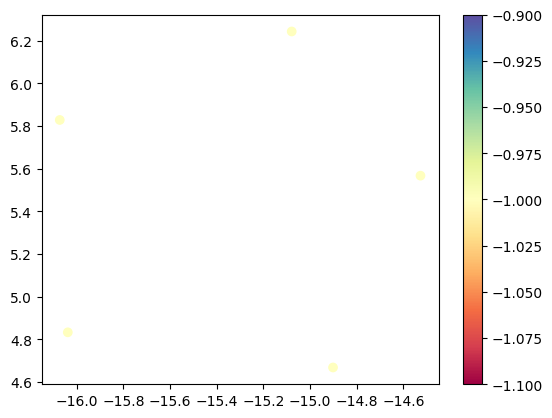

[ChoiceLogprobs(content=[ChatCompletionTokenLogprob(token='In', bytes=[73, 110], logprob=-0.8966215, top_logprobs=[]), ChatCompletionTokenLogprob(token=' Venus', bytes=[32, 86, 101, 110, 117, 115], logprob=-0.32691926, top_logprobs=[]), ChatCompletionTokenLogprob(token="'", bytes=[39], logprob=-0.7402899, top_logprobs=[]), ChatCompletionTokenLogprob(token=' skies', bytes=[32, 115, 107, 105, 101, 115], logprob=-0.58846366, top_logprobs=[]), ChatCompletionTokenLogprob(token=',', bytes=[44], logprob=-0.6006245, top_logprobs=[]), ChatCompletionTokenLogprob(token=' where', bytes=[32, 119, 104, 101, 114, 101], logprob=-0.47021097, top_logprobs=[]), ChatCompletionTokenLogprob(token=' clouds', bytes=[32, 99, 108, 111, 117, 100, 115], logprob=-1.4720117, top_logprobs=[]), ChatCompletionTokenLogprob(token=' of', bytes=[32, 111, 102], logprob=-1.7895817, top_logprobs=[]), ChatCompletionTokenLogprob(token=' acid', bytes=[32, 97, 99, 105, 100], logprob=-0.73177665, top_logprobs=[]), ChatCompletionT

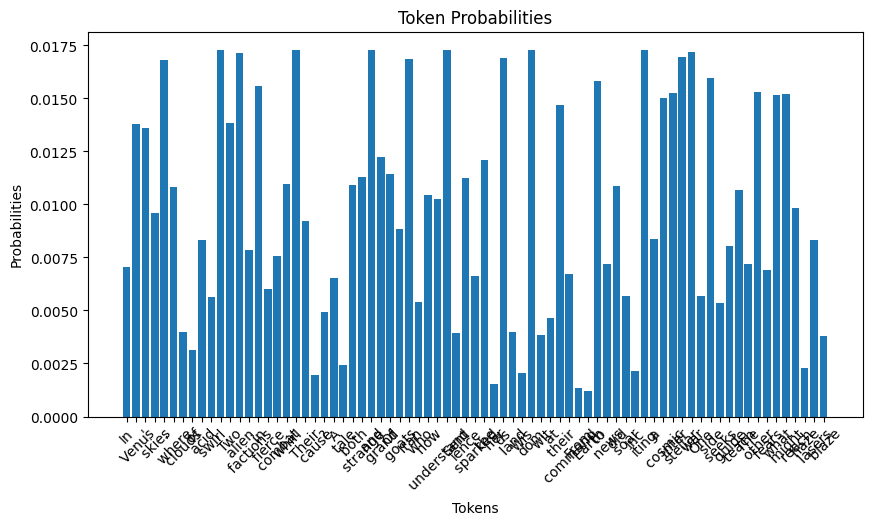

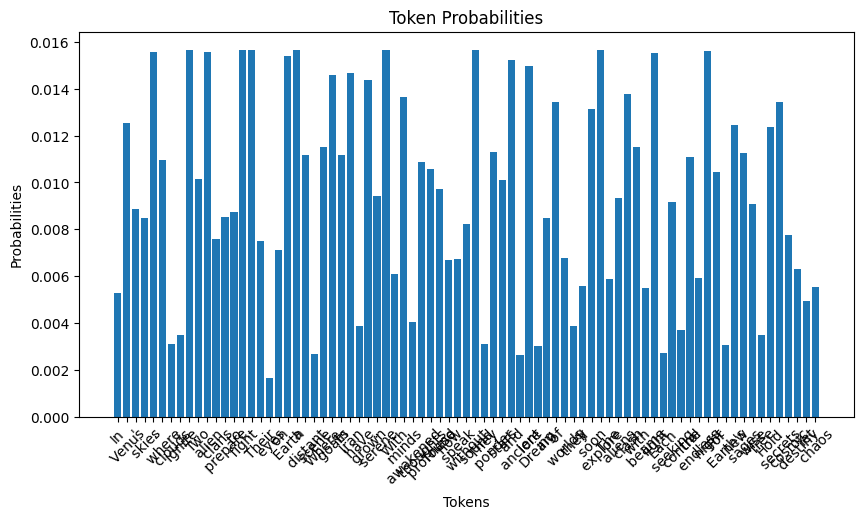

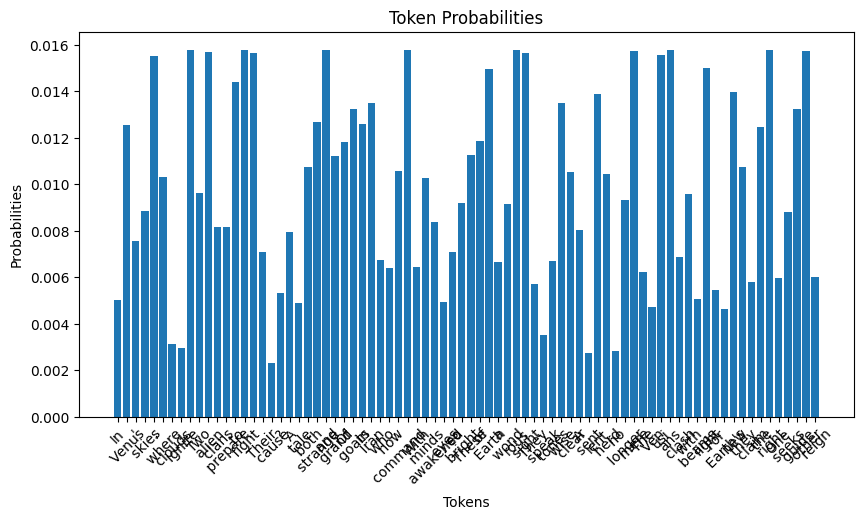

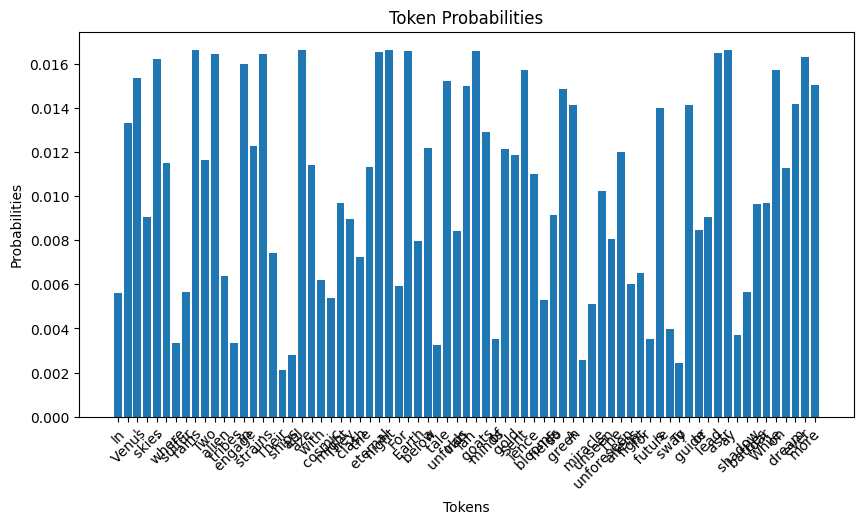

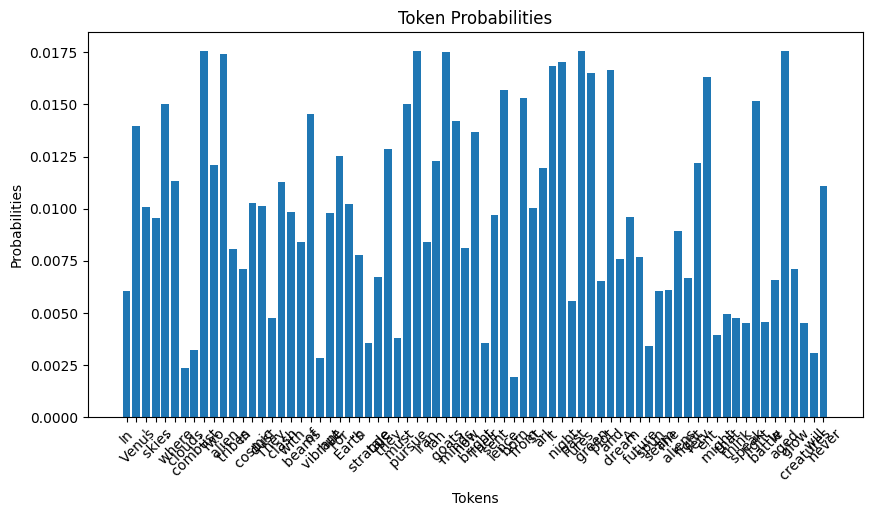

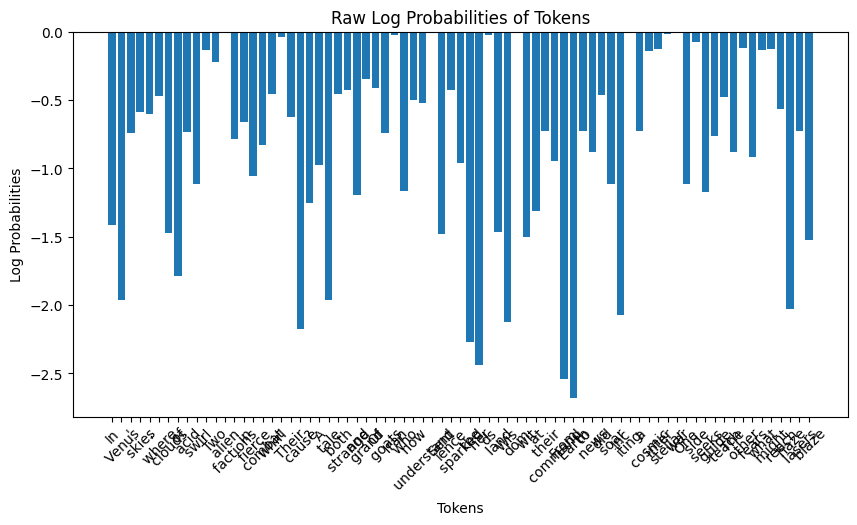

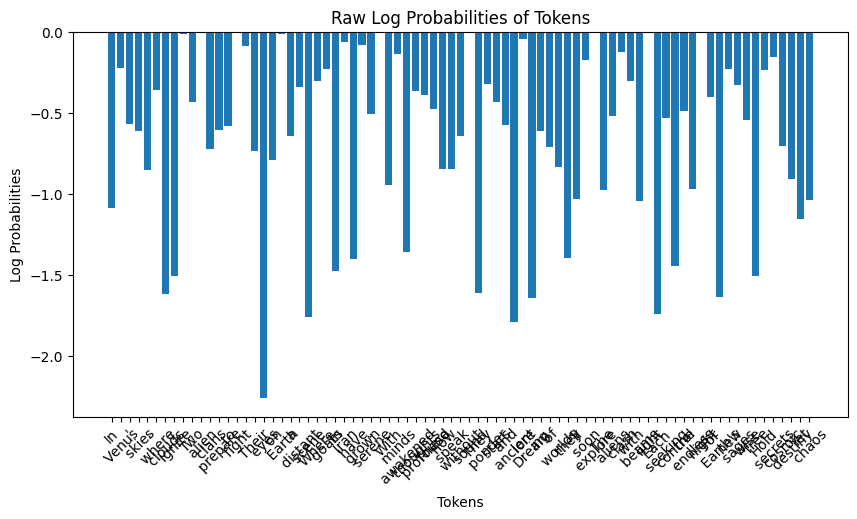

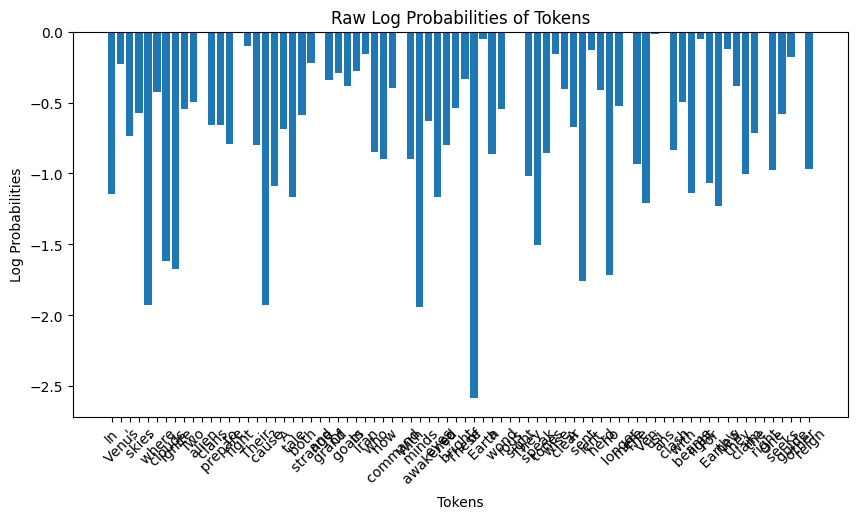

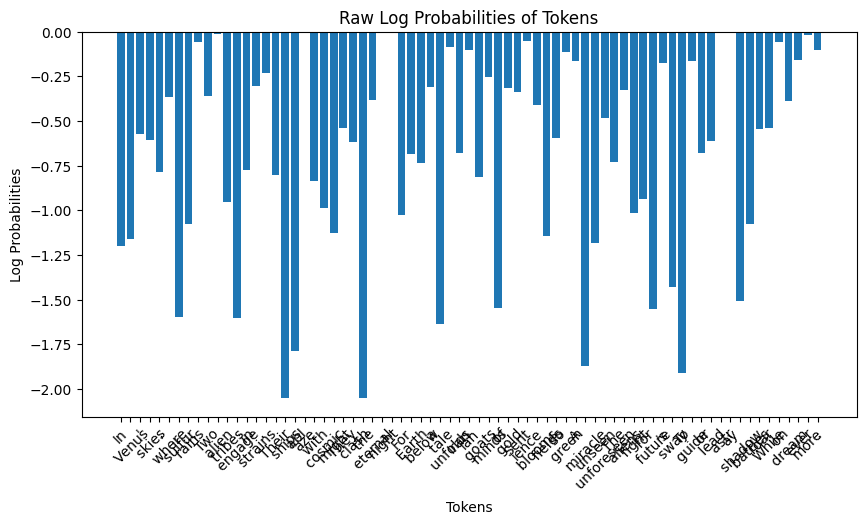

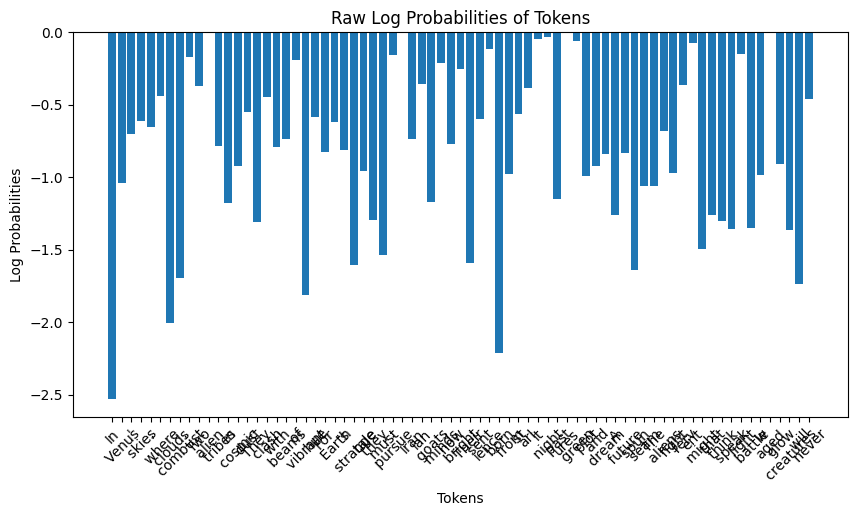

In [2]:
import openai
import os
import numpy as np
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import umap
from hdbscan import HDBSCAN
from sklearn.cluster import KMeans

client = openai.OpenAI(api_key="sk-proj-7MAfZbOm9lPY28pubTiRT3BlbkFJGgn73o5e6sVCjoTfoFAP")
MODEL = "gpt-4o"

# Function to get responses from GPT-4o
def get_responses(prompt, n, max_tokens=100, temperature=0.7, top_p=1.0, frequency_penalty=0.0, presence_penalty=0.0):
    responses = []
    log_probs = []
    for _ in range(n):
        response = client.chat.completions.create(
            model=MODEL,
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            frequency_penalty=frequency_penalty,
            presence_penalty=presence_penalty,
            logprobs=True
        )
        responses.append(response.choices[0].message.content)
        log_probs.append(response.choices[0].logprobs)
    return responses, log_probs


# Function to get embeddings for the responses
def get_embeddings(responses):
    model = SentenceTransformer('sentence-transformers/paraphrase-mpnet-base-v2')
    embeddings = model.encode(responses)
    return embeddings

# Function to cluster embeddings (HDBSCAN or K-Means)
def cluster_embeddings(embeddings, method='hdbscan'):
    if method == 'hdbscan':
        clusterer = HDBSCAN(min_cluster_size=15, cluster_selection_method='leaf')
        cluster_labels = clusterer.fit_predict(embeddings)
    else:
        clusterer = KMeans(n_clusters=5)
        cluster_labels = clusterer.fit_predict(embeddings)
    return cluster_labels

# Function to visualize embeddings using UMAP
def visualize_embeddings(embeddings, labels):
    n_neighbors = min(15, len(embeddings) - 1)
    reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors)
    reduced_embeddings = reducer.fit_transform(embeddings)
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='Spectral')
    plt.colorbar()
    plt.show()

def plot_raw_logits(probability_map):
    for entry in probability_map:
        tokens = entry['tokens']
        log_probs = entry['token_logprobs']  # Assuming this key will be added to the dictionary
        
        # Ensure we have valid data
        if tokens and log_probs and len(tokens) == len(log_probs):
            plt.figure(figsize=(10, 5))
            plt.bar(tokens, log_probs)
            plt.xlabel('Tokens')
            plt.ylabel('Log Probabilities')
            plt.title('Raw Log Probabilities of Tokens')
            plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
            plt.show()


def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))
    return exp_logits / exp_logits.sum()

def analyze_log_probs(log_probs):
    probability_map = []
    for choice in log_probs:
        # Access the 'content' attribute which is the list of 'ChatCompletionTokenLogprob'
        tokens = [token_logprob.token for token_logprob in choice.content]
        token_logprobs = [token_logprob.logprob for token_logprob in choice.content]

        # Convert log probabilities to probabilities using softmax
        token_probs = softmax(token_logprobs)

        probability_map.append({
            'tokens': tokens,
            'token_probs': token_probs,
            'token_logprobs': token_logprobs  # Store raw log probabilities for plotting
        })
    
    return probability_map

def plot_probabilities(probability_map):
    for entry in probability_map:
        tokens = entry['tokens']
        token_probs = entry['token_probs']
        
        # Ensure we have valid data
        if tokens and token_probs is not None and len(tokens) == len(token_probs):
            plt.figure(figsize=(10, 5))
            plt.bar(tokens, token_probs)
            plt.xlabel('Tokens')
            plt.ylabel('Probabilities')
            plt.title('Token Probabilities')
            plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
            plt.show()


# Main function to orchestrate the workflow
def main():
    prompt = "make me a short unique poem about aliens fighting on venus over earths iranian goat population gaining sentience"
    n = 10
    
    responses, log_probs = get_responses(
    prompt=prompt,
    n=5,
    max_tokens=100,
    temperature=2,
    top_p=0.3,
    frequency_penalty=0.1,
    presence_penalty=0.3
    )

    embeddings = get_embeddings(responses)
    
    # Choose clustering method ('hdbscan' or 'kmeans')
    clustering_method = 'hdbscan'
    cluster_labels = cluster_embeddings(embeddings, method=clustering_method)
    
    #print("Clustering Results:")
    #for i, response in enumerate(responses):
        #print(f"Cluster {cluster_labels[i]}: {response}")
    
    visualize_embeddings(embeddings, cluster_labels)

    print(log_probs)
    
    probability_map = analyze_log_probs(log_probs)
    print(probability_map)
    plot_probabilities(probability_map)
    plot_raw_logits(probability_map)

if __name__ == "__main__":
    main()


In [9]:
import openai
import numpy as np
from sentence_transformers import SentenceTransformer
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Initialize OpenAI client
client = openai.OpenAI(api_key="sk-proj-7MAfZbOm9lPY28pubTiRT3BlbkFJGgn73o5e6sVCjoTfoFAP")
MODEL = "gpt-4o"

# Function to get responses from GPT-4o
def get_responses(prompt, n, max_tokens=100, temperature=0.7, top_p=1.0, frequency_penalty=0.0, presence_penalty=0.0):
    responses = []
    log_probs = []
    for _ in range(n):
        response = client.chat.completions.create(
            model=MODEL,
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            frequency_penalty=frequency_penalty,
            presence_penalty=presence_penalty,
            logprobs=True
        )
        responses.append(response.choices[0].message.content)
        log_probs.append(response.choices[0].logprobs)
    return responses, log_probs

# Function to get embeddings for the responses
def get_embeddings(responses):
    model = SentenceTransformer('sentence-transformers/paraphrase-mpnet-base-v2')
    embeddings = model.encode(responses)
    return embeddings

# Function to convert log probabilities to probabilities using softmax
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))
    return exp_logits / exp_logits.sum()

def analyze_log_probs(log_probs):
    probability_map = []
    for choice in log_probs:
        # Access the 'content' attribute which is the list of 'ChatCompletionTokenLogprob'
        tokens = [token_logprob.token for token_logprob in choice.content]
        token_logprobs = [token_logprob.logprob for token_logprob in choice.content]

        # Convert log probabilities to probabilities using softmax
        token_probs = softmax(token_logprobs)

        probability_map.append({
            'tokens': tokens,
            'token_probs': token_probs,
            'token_logprobs': token_logprobs  # Store raw log probabilities for plotting
        })
    
    return probability_map

# Function to train an autoencoder
def train_autoencoder(input_data, latent_dim):
    encoder_input = tf.keras.Input(shape=(input_data.shape[-1],))
    encoded = tf.keras.layers.Dense(512, activation='relu')(encoder_input)
    encoded = tf.keras.layers.Dropout(0.5)(encoded)
    encoded = tf.keras.layers.Dense(256, activation='relu')(encoded)
    encoded = tf.keras.layers.Dense(128, activation='relu')(encoded)
    encoded_output = tf.keras.layers.Dense(latent_dim, activation='linear')(encoded)

    encoder = tf.keras.Model(encoder_input, encoded_output, name='encoder')

    decoder_input = tf.keras.Input(shape=(latent_dim,))
    decoded = tf.keras.layers.Dense(128, activation='relu')(decoder_input)
    decoded = tf.keras.layers.Dense(256, activation='relu')(decoded)
    decoded = tf.keras.layers.Dense(512, activation='relu')(decoded)
    decoded_output = tf.keras.layers.Dense(input_data.shape[-1], activation='sigmoid')(decoded)

    decoder = tf.keras.Model(decoder_input, decoded_output, name='decoder')

    autoencoder_input = encoder_input
    encoded_embedding = encoder(autoencoder_input)
    decoded_embedding = decoder(encoded_embedding)

    autoencoder = tf.keras.Model(autoencoder_input, decoded_embedding, name='autoencoder')
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

    autoencoder.fit(input_data, input_data, epochs=10, batch_size=16, verbose=1)
    return encoder

# Function to visualize 2D grid in 3D with smoothing
def visualize_2d_grid(encoded_2d_grid, grid_size):
    smoothed_grids = np.array([gaussian_filter(grid, sigma=1) for grid in encoded_2d_grid])

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(range(grid_size), range(grid_size))
    for i in range(smoothed_grids.shape[0]):
        Z = smoothed_grids[i]
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

    ax.set_title('3D Visualization of Smoothed Text Embeddings')
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Embedding Value')
    plt.show()

def extract_token_probs(data):
    # Initialize an empty list to store the token probabilities
    token_probs_list = []
    
    # Iterate over each entry in the data list
    for entry in data:
        # Check if 'token_probs' key exists in the dictionary
        if 'token_probs' in entry:
            # Append the numpy array of token probabilities to the list
            token_probs_list.append(entry['token_probs'])
    
    # Return the list of token probabilities
    return token_probs_list

# Main function to orchestrate the workflow
def main():
    prompt = "make me a short unique poem about aliens fighting on venus over earths iranian goat population gaining sentience"
    n = 1
    responses, log_probs = get_responses(prompt, n)
    embeddings = get_embeddings(responses)

    probability_map = analyze_log_probs(log_probs)
    token_probs_list = extract_token_probs(probability_map)
    print(token_probs_list)
    die
    
    # Extract token probabilities from the probability map
    token_probabilities = np.array([entry['token_probs'] for entry in probability_map])
    
    # Combine embeddings and token probabilities
    combined_input = np.hstack((embeddings, token_probabilities))

    grid_size = 30
    latent_dim = grid_size * grid_size
    encoder = train_autoencoder(combined_input, latent_dim)

    encoded_2d_grid = encoder(combined_input).numpy().reshape(-1, grid_size, grid_size)
    visualize_2d_grid(encoded_2d_grid, grid_size)

if __name__ == "__main__":
    main()


[array([0.00551367, 0.01856114, 0.00025633, 0.00561939, 0.01081853,
       0.00403634, 0.01215793, 0.01435594, 0.00828057, 0.00881262,
       0.0057509 , 0.00612845, 0.00313441, 0.01377444, 0.01943588,
       0.00844817, 0.01130667, 0.00657142, 0.00511385, 0.00016305,
       0.00151862, 0.01006899, 0.01921774, 0.01942288, 0.00216446,
       0.00139898, 0.01934765, 0.01783945, 0.00060252, 0.0184061 ,
       0.01784855, 0.01941222, 0.00157797, 0.00159072, 0.00977915,
       0.01941065, 0.00789613, 0.01820615, 0.00928042, 0.01942055,
       0.01819413, 0.01288733, 0.01501137, 0.00315632, 0.00575282,
       0.00540683, 0.01759345, 0.00533393, 0.00989527, 0.01197314,
       0.01587009, 0.0046017 , 0.00415462, 0.01575094, 0.00340664,
       0.01930666, 0.00103798, 0.01431384, 0.00104176, 0.00552497,
       0.01912807, 0.00095203, 0.0194514 , 0.01945034, 0.00353271,
       0.00093753, 0.00853065, 0.01674075, 0.01200717, 0.00116922,
       0.00719195, 0.01944732, 0.00141353, 0.00369576, 0.0053

NameError: name 'die' is not defined

In [ ]:
    grid_size = 30
    latent_dim = grid_size * grid_size
    encoder = train_autoencoder(combined_input, latent_dim)

    encoded_2d_grid = encoder(combined_input).numpy().reshape(-1, grid_size, grid_size)
    visualize_2d_grid(encoded_2d_grid, grid_size)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2583
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2579
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2572
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2559
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2538
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2501 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2448
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2359
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2209
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1990
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1725
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1352
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0935
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0619 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0373
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━

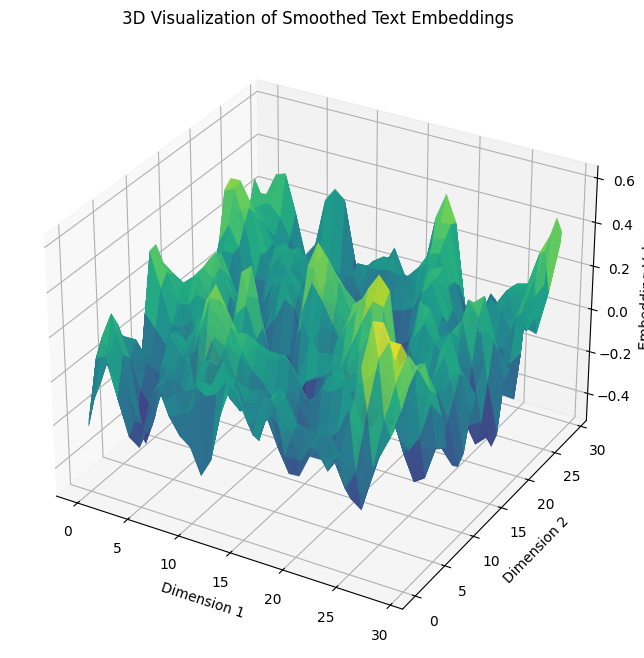

In [11]:
import openai
import numpy as np
from sentence_transformers import SentenceTransformer
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Initialize OpenAI client
client = openai.OpenAI(api_key="sk-proj-7MAfZbOm9lPY28pubTiRT3BlbkFJGgn73o5e6sVCjoTfoFAP")
MODEL = "gpt-4o"

# Function to get responses from GPT-4o
def get_responses(prompt, n, max_tokens=100, temperature=0.7, top_p=1.0, frequency_penalty=0.0, presence_penalty=0.0):
    responses = []
    log_probs = []
    for _ in range(n):
        response = client.chat.completions.create(
            model=MODEL,
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            frequency_penalty=frequency_penalty,
            presence_penalty=presence_penalty,
            logprobs=True
        )
        responses.append(response.choices[0].message.content)
        log_probs.append(response.choices[0].logprobs)
    return responses, log_probs

# Function to get embeddings for the responses
def get_embeddings(responses):
    model = SentenceTransformer('sentence-transformers/paraphrase-mpnet-base-v2')
    embeddings = model.encode(responses)
    return embeddings

# Function to convert log probabilities to probabilities using softmax
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))
    return exp_logits / exp_logits.sum()

def analyze_log_probs(log_probs):
    probability_map = []
    for choice in log_probs:
        tokens = [token_logprob.token for token_logprob in choice.content]
        token_logprobs = [token_logprob.logprob for token_logprob in choice.content]
        token_probs = softmax(token_logprobs)
        probability_map.append({
            'tokens': tokens,
            'token_probs': token_probs,
            'token_logprobs': token_logprobs
        })
    return probability_map

# Function to train an autoencoder
def train_autoencoder(input_data, latent_dim):
    encoder_input = tf.keras.Input(shape=(input_data.shape[-1],))
    encoded = tf.keras.layers.Dense(512, activation='relu')(encoder_input)
    encoded = tf.keras.layers.Dropout(0.5)(encoded)
    encoded = tf.keras.layers.Dense(256, activation='relu')(encoded)
    encoded = tf.keras.layers.Dense(128, activation='relu')(encoded)
    encoded_output = tf.keras.layers.Dense(latent_dim, activation='linear')(encoded)
    encoder = tf.keras.Model(encoder_input, encoded_output, name='encoder')
    decoder_input = tf.keras.Input(shape=(latent_dim,))
    decoded = tf.keras.layers.Dense(128, activation='relu')(decoder_input)
    decoded = tf.keras.layers.Dense(256, activation='relu')(decoded)
    decoded = tf.keras.layers.Dense(512, activation='relu')(decoded)
    decoded_output = tf.keras.layers.Dense(input_data.shape[-1], activation='sigmoid')(decoded)
    decoder = tf.keras.Model(decoder_input, decoded_output, name='decoder')
    autoencoder_input = encoder_input
    encoded_embedding = encoder(autoencoder_input)
    decoded_embedding = decoder(encoded_embedding)
    autoencoder = tf.keras.Model(autoencoder_input, decoded_embedding, name='autoencoder')
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')
    autoencoder.fit(input_data, input_data, epochs=20, batch_size=8, verbose=1)
    return encoder

# Function to visualize 2D grid in 3D with smoothing
def visualize_2d_grid(encoded_2d_grid, grid_size):
    smoothed_grids = np.array([gaussian_filter(grid, sigma=1) for grid in encoded_2d_grid])
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(range(grid_size), range(grid_size))
    for i in range(smoothed_grids.shape[0]):
        Z = smoothed_grids[i]
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
    ax.set_title('3D Visualization of Smoothed Text Embeddings')
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Embedding Value')
    plt.show()

# Main function to orchestrate the workflow
def main():
    prompt = "make me a short unique poem about aliens fighting on venus over earths iranian goat population gaining sentience"
    n = 20
    responses, log_probs = get_responses(prompt, n)
    embeddings = get_embeddings(responses)
    probability_map = analyze_log_probs(log_probs)
    token_probs_list = np.array([entry['token_probs'] for entry in probability_map])
    combined_input = np.hstack((embeddings, token_probs_list))
    grid_size = 30
    latent_dim = grid_size * grid_size
    encoder = train_autoencoder(combined_input, latent_dim)
    encoded_2d_grid = encoder(combined_input).numpy().reshape(-1, grid_size, grid_size)
    visualize_2d_grid(encoded_2d_grid, grid_size)

if __name__ == "__main__":
    main()


In [13]:
grid_size = 30
latent_dim = grid_size * grid_size
encoder = train_autoencoder(combined_input, latent_dim)
encoded_2d_grid = encoder(combined_input).numpy().reshape(-1, grid_size, grid_size)
visualize_2d_grid(encoded_2d_grid, grid_size)

NameError: name 'combined_input' is not defined